### CME speed as a function of:

- __GOES Peak Flare Flux__ 
    - CME width as markers
    
    
- __AR Total Flux__ 
    - GOES Peak Flare Flux as markers

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
#=== GOES Flux ==============================================================================================================
dfb = df[['cme_speed', 'goes_flux', 'cme_width']]

# Removing the rows containing any NaN values
dfb = dfb.dropna(how='any')

#Reindexing
dfb = dfb.reset_index(drop=True)

# Creating a custom colormap
cmap = mpl.colors.ListedColormap(['lightseagreen', 'darkmagenta', 'mediumblue', 'darkorange'])
bounds = [0, 90, 180, 270, 360]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#=== Total Flux ==============================================================================================================
dfc = df[['cme_speed', 'goes_flux', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

#Reindexing
dfc = dfc.reset_index(drop=True)

# Colormap
cmap1 = mpl.colors.ListedColormap(['lightseagreen', 'darkmagenta', 'mediumblue', 'darkgreen', 'darkorange'])
bounds1 = [-8, -7, -6, -5, -4, -3]
norm1 = mpl.colors.BoundaryNorm(bounds1, cmap1.N)

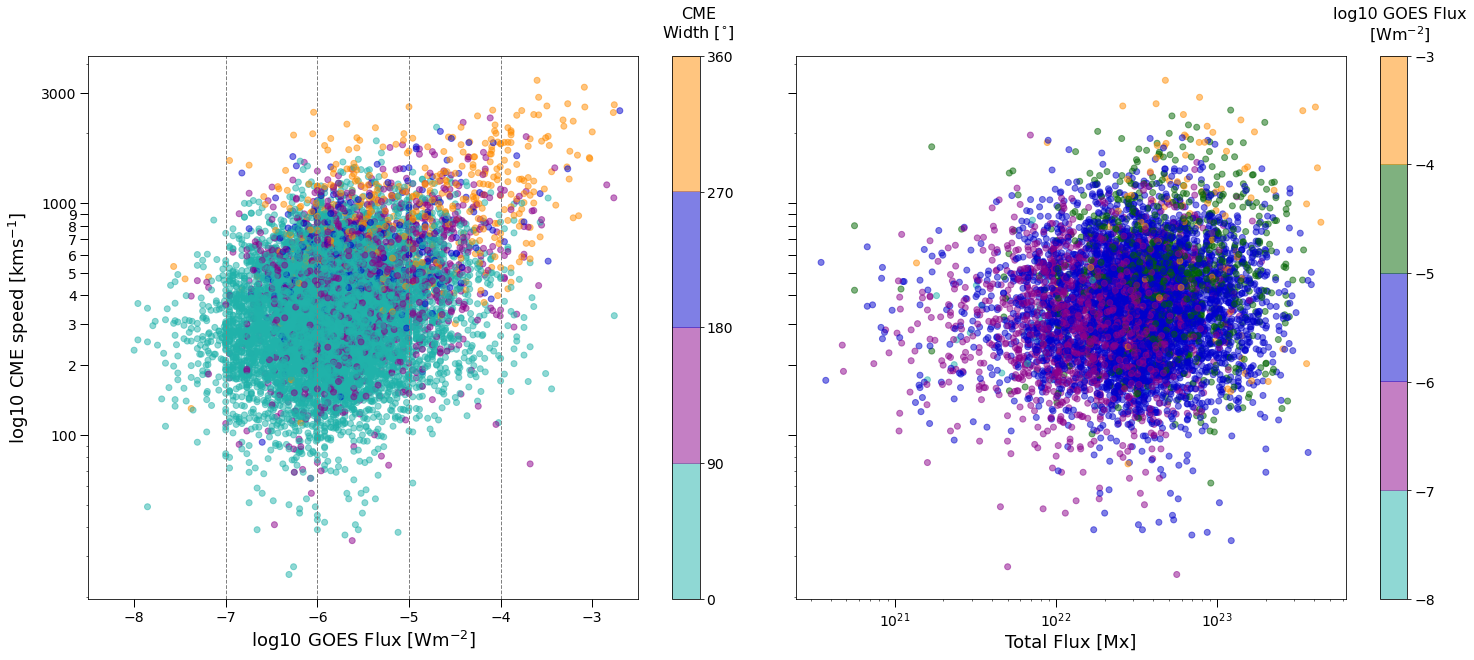

In [4]:
#=== PLOTTING ==================================================================================================================
plt.figure(figsize=[25, 10], facecolor='white')
plt.subplots_adjust(wspace=0.03)

# GOES Flux
plt.subplot(121)
s1 = plt.scatter(x=np.log10(dfb['goes_flux']), y=dfb['cme_speed'], c=dfb['cme_width'],
                alpha=0.5, cmap=cmap, norm=norm)
plt.xlabel("log10 GOES Flux [Wm$^{-2}$]", fontsize=18)
plt.ylabel("log10 CME speed [kms$^{-1}$]", fontsize=18, labelpad=10)
plt.xlim(-8.5, -2.5)
plt.yscale("log", base=10)
plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000],
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)
plt.xticks(fontsize=14)
ax1 = plt.gca()
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
y_min, y_max = ax1.get_ylim()
plt.ylim(y_min, y_max)

# Colour bar
cbar = plt.colorbar(s1)
cbar.set_label('CME\nWidth [$^{\circ}$]', fontsize=16, rotation=0, labelpad=-35, y=1.09)
cbar.ax.tick_params(labelsize=14)

# GOES lines
lines = [-7, -6, -5, -4]
plt.vlines(lines, ymin=y_min, ymax=y_max, ls='dashed', colors='grey', lw=1)


# Total Flux
plt.subplot(122)
s2 = plt.scatter(x=dfc['smart_total_flux'], y=dfc['cme_speed'], c=np.log10(dfc['goes_flux']),
                alpha=0.5, cmap=cmap1, norm=norm1)
plt.xlabel("Total Flux [Mx]", fontsize=18)
plt.ylabel('')
plt.xscale("log")
plt.yscale("log", base=10)
plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000],
           labels=[r'', r'', r'', r'', r'', r'', r'', r'', r'', r'', r''],
           fontsize=14)
plt.xticks(ticks=[1e21, 1e22, 1e23],
           labels=[r'10$^{21}$', r'10$^{22}$', r'10$^{23}$'],
           fontsize=14)
ax2 = plt.gca()
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)

# Colour bar
cbar1 = plt.colorbar(s2)
cbar1.set_label('log10 GOES Flux\n[Wm$^{-2}$]', fontsize=16, rotation=0, labelpad=-35, y=1.09)
cbar1.ax.tick_params(labelsize=14)

#plt.savefig('speed_flux_v3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()